In [17]:
import pandas as pd
import numpy as np

In [18]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

In [19]:
data_ads

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Vamos a realizar la correlacion de Pearsons

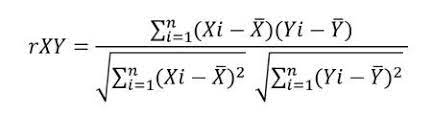

In [20]:
from IPython.display import Image
Image(filename="../resources/Pearsons.JPG")

In [21]:
data_ads["Pearsons numerador"] = (data_ads["TV"]- np.mean(data_ads["TV"]))* (data_ads["Sales"]-np.mean(data_ads["Sales"]))

In [22]:
data_ads

,TV,Radio,Newspaper,Sales,Pearsons numerador
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,699.040956
196,94.2,4.9,8.1,9.7,228.411706
197,177.0,9.3,6.4,12.8,-36.623044
198,283.6,42.0,66.2,25.5,1567.338706


In [24]:
data_ads["corr1"] = (data_ads["TV"]- np.mean(data_ads["TV"]))**2
data_ads["corr2"] = (data_ads["Sales"]-np.mean(data_ads["Sales"]))**2

In [25]:
data_ads

,TV,Radio,Newspaper,Sales,Pearsons numerador,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006
...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,699.040956,11846.689806,41.248506
196,94.2,4.9,8.1,9.7,228.411706,2792.329806,18.684006
197,177.0,9.3,6.4,12.8,-36.623044,897.451806,1.494506
198,283.6,42.0,66.2,25.5,1567.338706,18647.950806,131.733006


### Reemplazamos en la formula

In [28]:
data_ads["corr_pearsons"] = sum(data_ads["Pearsons numerador"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [29]:
data_ads

,TV,Radio,Newspaper,Sales,Pearsons numerador,corr1,corr2,corr_pearsons
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006,0.782224
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506,0.782224
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006,0.782224
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006,0.782224
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006,0.782224
...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,699.040956,11846.689806,41.248506,0.782224
196,94.2,4.9,8.1,9.7,228.411706,2792.329806,18.684006,0.782224
197,177.0,9.3,6.4,12.8,-36.623044,897.451806,1.494506,0.782224
198,283.6,42.0,66.2,25.5,1567.338706,18647.950806,131.733006,0.782224


### O hacemos

In [30]:
corr_pearsons = sum(data_ads["Pearsons numerador"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [32]:
corr_pearsons # nos da directo

0.782224424861606

#### Esto quiere decir que mientras mas se gasta en television, mas se genera en ventas

## Vamos a crear una función que realice todo esto

In [50]:
def corr_coeff(df,var1,var2):

    a = (df[var1]- np.mean(df[var1]))* (data_ads[var2]-np.mean(data_ads[var2]))
    b = (df[var1]- np.mean(df[var1]))**2
    c = (df[var2]-np.mean(df[var2]))**2

    d = sum(a) / np.sqrt(sum(b)*sum(c))

  
    return d
   

In [51]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

In [54]:
corr_coeff(data_ads, "Radio", "TV")

0.05480866446583006

In [58]:
data_ads2 = pd.read_csv("../datasets/ads/Advertising.csv")
cols = data_ads2.columns.values
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [59]:
for x in cols:
    for y in cols:
        print(x + ", "+ y + ": " + str(corr_coeff(data_ads2,x,y)))

TV, TV: 1.0
TV, Radio: 0.05480866446583006
TV, Newspaper: 0.056647874965056993
TV, Sales: 0.782224424861606
Radio, TV: 0.05480866446583006
Radio, Radio: 1.0
Radio, Newspaper: 0.35410375076117545
Radio, Sales: 0.576222574571055
Newspaper, TV: 0.056647874965056993
Newspaper, Radio: 0.35410375076117545
Newspaper, Newspaper: 1.0
Newspaper, Sales: 0.22829902637616534
Sales, TV: 0.782224424861606
Sales, Radio: 0.576222574571055
Sales, Newspaper: 0.22829902637616534
Sales, Sales: 1.0


In [60]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, ' Gasto en TV vs Ventas de Producto')

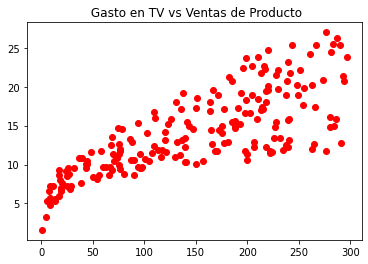

In [70]:
plt.plot(data_ads2["TV"], data_ads2["Sales"], "ro")
plt.title(" Gasto en TV vs Ventas de Producto")

Text(0.5, 1.0, ' Gasto en TV vs Ventas de Producto')

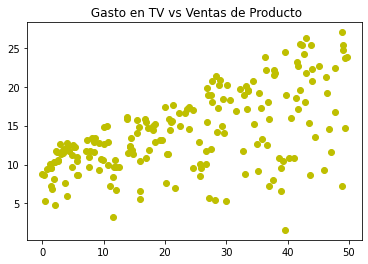

In [82]:
plt.plot(data_ads2["Radio"], data_ads2["Sales"], "yo")
plt.title(" Gasto en Radio vs Ventas de Producto")

Text(0.5, 1.0, ' Gasto en Radio vs Ventas de Producto')

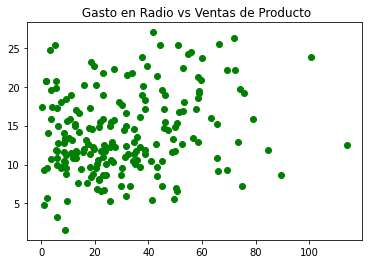

In [85]:
plt.plot(data_ads2["Newspaper"], data_ads2["Sales"], "go")
plt.title(" Gasto en Radio vs Ventas de Producto")

## Vamos a ver como se hace con pandas
#### Mucho mas facil pero lo anterior era para entender el concepto

In [86]:
data_ads2.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


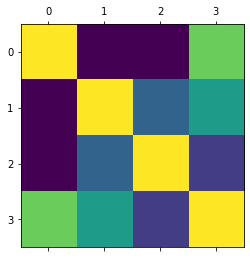

In [87]:
plt.matshow(data_ads2.corr())